In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split, GridSearchCV
import imblearn
plt.rcParams["patch.force_edgecolor"] = True
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy import stats

In [2]:
# Import the data into a dataframe
test = pd.read_csv('data/Test.csv')
train = pd.read_csv('data/train.csv')

test = test.drop('uniqueid', axis=1)
train = train.drop('uniqueid', axis=1)

In [3]:
train.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Make bins for household size in train
household_bins = pd.cut(train['household_size'], [1, 3, 7, 10, 25], labels=['single', 'small', 'average', 'big'])
household_bins.name = 'household_sizes'

train = train.join(household_bins, how='inner')
train = train.drop('household_size', axis=1)
train.head()

,country,year,bank_account,location_type,cellphone_access,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_sizes
0,Kenya,2018,Yes,Rural,Yes,24,Female,Spouse,Married/Living together,Secondary education,Self employed,single
1,Kenya,2018,No,Rural,No,70,Female,Head of Household,Widowed,No formal education,Government Dependent,small
2,Kenya,2018,Yes,Urban,Yes,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,small
3,Kenya,2018,No,Rural,Yes,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,small
4,Kenya,2018,No,Urban,No,26,Male,Child,Single/Never Married,Primary education,Informally employed,average


In [5]:
# Make bins for household size in test
household_bins = pd.cut(test['household_size'], [1, 3, 7, 10, 25], labels=['single', 'small', 'average', 'big'])
household_bins.name = 'household_sizes'

test = test.join(household_bins, how='inner')
test = test.drop('household_size', axis=1)
test.head()

,country,year,location_type,cellphone_access,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_sizes
0,Kenya,2018,Urban,Yes,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,single
1,Kenya,2018,Urban,Yes,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,small
2,Kenya,2018,Rural,No,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,single
3,Kenya,2018,Rural,No,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,small
4,Kenya,2018,Urban,No,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,single


In [6]:
# Make bins for age in train
age_bins = pd.cut(train['age_of_respondent'], [0, 16, 45, 75, 100], labels=['child', 'adult', 'elder', 'old'])
age_bins.name = 'ages'

train = train.join(age_bins, how='inner')
train = train.drop('age_of_respondent', axis=1)
train.head()

,country,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_sizes,ages
0,Kenya,2018,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,single,adult
1,Kenya,2018,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,small,elder
2,Kenya,2018,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,small,adult
3,Kenya,2018,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,small,adult
4,Kenya,2018,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,average,adult


In [7]:
# Make bins for age in test
age_bins = pd.cut(test['age_of_respondent'], [0, 16, 45, 75, 100], labels=['child', 'adult', 'elder', 'old'])
age_bins.name = 'ages'

test = test.join(age_bins, how='inner')
test = test.drop('age_of_respondent', axis=1)
test.head()

,country,year,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_sizes,ages
0,Kenya,2018,Urban,Yes,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,single,adult
1,Kenya,2018,Urban,Yes,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,small,elder
2,Kenya,2018,Rural,No,Female,Parent,Married/Living together,No formal education,Remittance Dependent,single,old
3,Kenya,2018,Rural,No,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,small,adult
4,Kenya,2018,Urban,No,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,single,child


In [8]:
# make dummie variables for train
train = pd.get_dummies(train, drop_first=True)
train.head().T

,0,1,2,3,4
year,2018,2018,2018,2018,2018
country_Rwanda,False,False,False,False,False
country_Tanzania,False,False,False,False,False
country_Uganda,False,False,False,False,False
bank_account_Yes,True,False,True,False,False
location_type_Urban,False,False,True,False,True
cellphone_access_Yes,True,False,True,True,False
gender_of_respondent_Male,False,False,True,False,True
relationship_with_head_Head of Household,False,True,False,True,False
relationship_with_head_Other non-relatives,False,False,False,False,False


In [9]:
# make dummie variables for test
test = pd.get_dummies(test, drop_first=True)
test.head().T

,0,1,2,3,4
year,2018,2018,2018,2018,2018
country_Rwanda,False,False,False,False,False
country_Tanzania,False,False,False,False,False
country_Uganda,False,False,False,False,False
location_type_Urban,True,True,False,False,True
cellphone_access_Yes,True,True,False,False,False
gender_of_respondent_Male,True,True,False,False,True
relationship_with_head_Head of Household,True,True,False,True,False
relationship_with_head_Other non-relatives,False,False,False,False,False
relationship_with_head_Other relative,False,False,False,False,False


In [10]:
# Train-test Split

# Defining X and y
features = train.columns.tolist()
features.remove('bank_account_Yes')

X = train[features]
y = train.bank_account_Yes

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (16466, 36)
y_train: (16466,)
X_test: (7058, 36)
y_test: (7058,)


In [11]:
# Perform undersampling on the majority class
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [12]:
# Perform oversampling on the minority class
oversampler = SMOTE(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

## Decision Tree

In [13]:
# Create Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# Predict
y_pred_tree = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[5751  313]
 [ 625  369]]
              precision    recall  f1-score   support

       False       0.90      0.95      0.92      6064
        True       0.54      0.37      0.44       994

    accuracy                           0.87      7058
   macro avg       0.72      0.66      0.68      7058
weighted avg       0.85      0.87      0.86      7058



In [15]:
# Create Decision Tree with undersampling
dtree = DecisionTreeClassifier()
dtree.fit(X_train_under, y_train_under)

DecisionTreeClassifier()

In [16]:
# Predict with undersampling
y_pred_tree = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[4696 1368]
 [ 300  694]]
              precision    recall  f1-score   support

       False       0.94      0.77      0.85      6064
        True       0.34      0.70      0.45       994

    accuracy                           0.76      7058
   macro avg       0.64      0.74      0.65      7058
weighted avg       0.85      0.76      0.79      7058



In [17]:
# Create Decision Tree with oversampling
dtree = DecisionTreeClassifier()
dtree.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [18]:
# Predict with oversampling
y_pred_tree = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[4953 1111]
 [ 372  622]]
              precision    recall  f1-score   support

       False       0.93      0.82      0.87      6064
        True       0.36      0.63      0.46       994

    accuracy                           0.79      7058
   macro avg       0.64      0.72      0.66      7058
weighted avg       0.85      0.79      0.81      7058



---

## Random Forest

In [19]:
#Create Random Forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Predict
y_pred_forest = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

[[4953 1111]
 [ 372  622]]
              precision    recall  f1-score   support

       False       0.93      0.82      0.87      6064
        True       0.36      0.63      0.46       994

    accuracy                           0.79      7058
   macro avg       0.64      0.72      0.66      7058
weighted avg       0.85      0.79      0.81      7058



In [21]:
#Create Random Forest with undersampling
forest = RandomForestClassifier()
forest.fit(X_train_under, y_train_under)

RandomForestClassifier()

In [22]:
# predict with undersampling
y_pred_forest = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

[[4953 1111]
 [ 372  622]]
              precision    recall  f1-score   support

       False       0.93      0.82      0.87      6064
        True       0.36      0.63      0.46       994

    accuracy                           0.79      7058
   macro avg       0.64      0.72      0.66      7058
weighted avg       0.85      0.79      0.81      7058



In [23]:
#Create Random Forest with oversampling
forest = RandomForestClassifier()
forest.fit(X_train_over, y_train_over)

RandomForestClassifier()

In [24]:
# Predict with oversampling
y_pred_forest = dtree.predict(X_test)
print(y_pred_forest)
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

[False  True False ... False False False]
[[4953 1111]
 [ 372  622]]
              precision    recall  f1-score   support

       False       0.93      0.82      0.87      6064
        True       0.36      0.63      0.46       994

    accuracy                           0.79      7058
   macro avg       0.64      0.72      0.66      7058
weighted avg       0.85      0.79      0.81      7058



---

### Decision Tree w/o over- or undersampling has best precision
__Fit test data to model__

In [25]:
test.head().T

,0,1,2,3,4
year,2018,2018,2018,2018,2018
country_Rwanda,False,False,False,False,False
country_Tanzania,False,False,False,False,False
country_Uganda,False,False,False,False,False
location_type_Urban,True,True,False,False,True
cellphone_access_Yes,True,True,False,False,False
gender_of_respondent_Male,True,True,False,False,True
relationship_with_head_Head of Household,True,True,False,True,False
relationship_with_head_Other non-relatives,False,False,False,False,False
relationship_with_head_Other relative,False,False,False,False,False


In [26]:
# Defining X and  for test
features = test.columns.tolist()
X = test[features]

# Predict
y_pred_tree = dtree.predict(X)
series = pd.Series(y_pred_tree).astype(int)
series.name = 'bank_account'

test_new = pd.concat([test, series], axis=1).astype(bool)
test_new.head().T

,0,1,2,3,4
year,True,True,True,True,True
country_Rwanda,False,False,False,False,False
country_Tanzania,False,False,False,False,False
country_Uganda,False,False,False,False,False
location_type_Urban,True,True,False,False,True
cellphone_access_Yes,True,True,False,False,False
gender_of_respondent_Male,True,True,False,False,True
relationship_with_head_Head of Household,True,True,False,True,False
relationship_with_head_Other non-relatives,False,False,False,False,False
relationship_with_head_Other relative,False,False,False,False,False


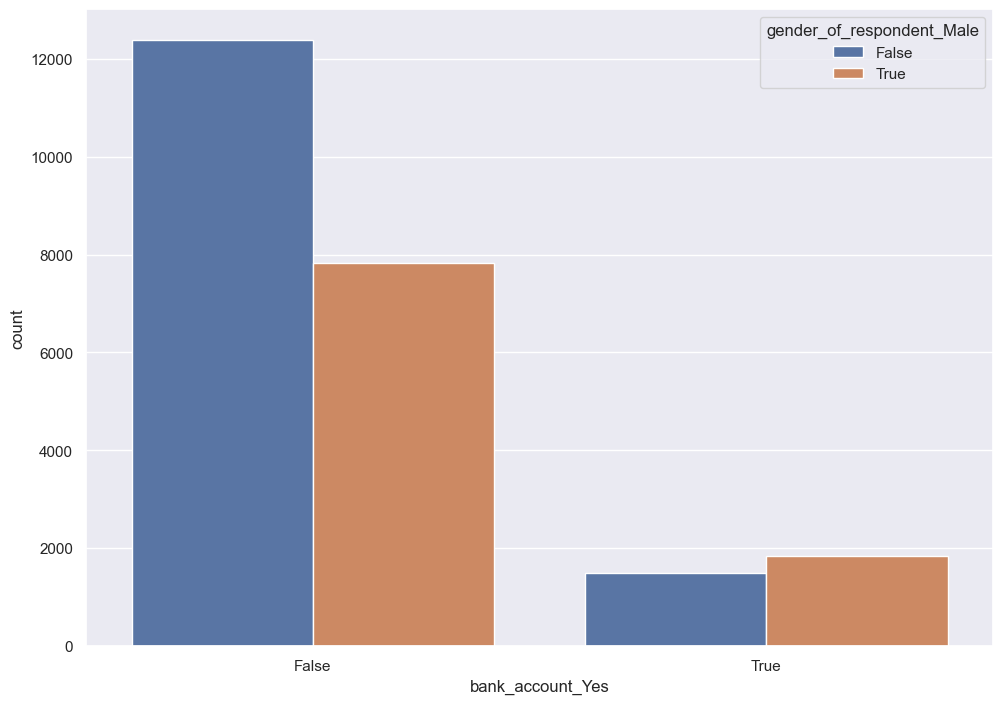

In [27]:
# make countplot for bank_account of train dataset
# Countplot with bank account, hue=gender
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train['bank_account_Yes'], hue=train['gender_of_respondent_Male']);

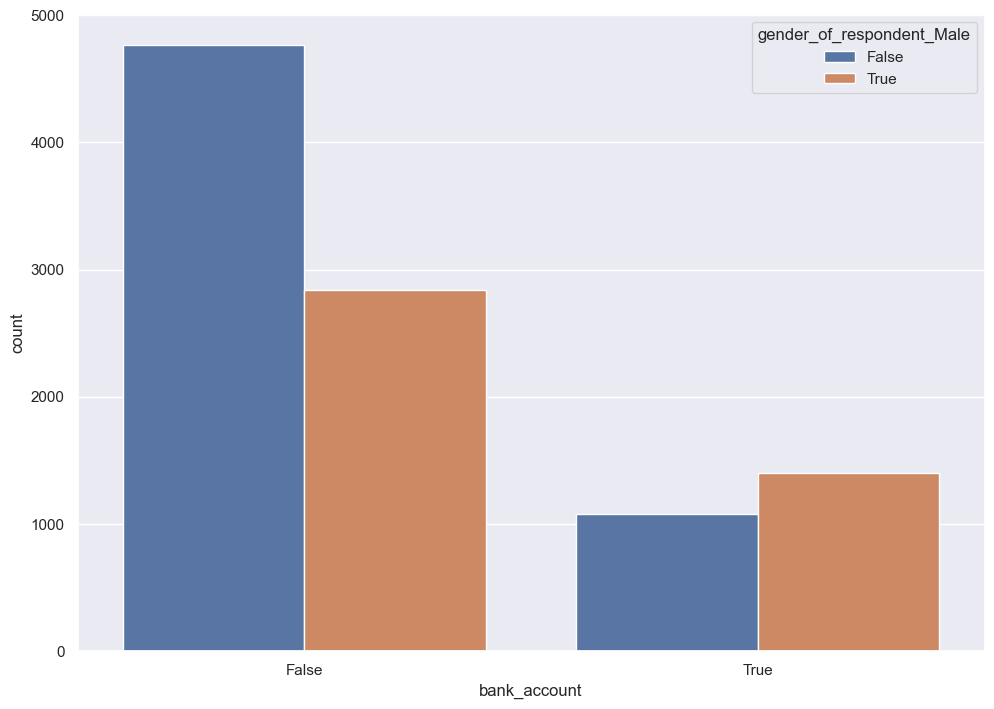

In [28]:
# make countplot for bank_account of test dataset
# Countplot with bank account, hue=gender
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=test_new['bank_account'], hue=test_new['gender_of_respondent_Male']);

### KNN Model

Train the KNN Model with the train dataset

In [60]:
# Splitting features and target
X = train.drop('bank_account_Yes', axis=1)
y = train['bank_account_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the k-NN model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)  

# Make predictions
y_pred = knn.predict(X_test)

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.97      0.93      4063
        True       0.63      0.35      0.45       642

    accuracy                           0.88      4705
   macro avg       0.76      0.66      0.69      4705
weighted avg       0.87      0.88      0.87      4705



Apply the Model on the test dataset

In [46]:
# Add a new column 'bank_account' with NaN values
test['bank_account'] = float('nan')

In [47]:
test.head()

,year,country_Rwanda,country_Tanzania,country_Uganda,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,household_sizes_small,household_sizes_average,household_sizes_big,ages_adult,ages_elder,ages_old,bank_account
0,2018,False,False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,True,False,False,NaN
1,2018,False,False,False,True,True,True,True,False,False,...,False,False,False,True,False,False,False,True,False,NaN
2,2018,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,NaN
3,2018,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,True,False,False,NaN
4,2018,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,NaN


In [50]:
# Separate the features from the 'train' dataset
X_train = train.drop('bank_account_Yes', axis=1)
y_train = train['bank_account_Yes']

# Create and train the k-NN model using the 'train' dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Apply the trained model on the 'test' dataset to predict 'bank_account' values
X_test = test.drop('bank_account', axis=1)  # Features
predictions = knn.predict(X_test)

# Update the 'test' dataset with the predicted 'bank_account' values
test['bank_account'] = predictions

In [51]:
test.head()

,year,country_Rwanda,country_Tanzania,country_Uganda,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,household_sizes_small,household_sizes_average,household_sizes_big,ages_adult,ages_elder,ages_old,bank_account
0,2018,False,False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1,2018,False,False,False,True,True,True,True,False,False,...,False,False,False,True,False,False,False,True,False,True
2,2018,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,2018,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,True,False,False,False
4,2018,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
